# Chat Intents

## CorEx Topic Modeling

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from corextopic import corextopic as ct

In [4]:
data_sample = pd.read_csv('../data/processed/data_sample.csv')
data_sample.head()

,Unnamed: 0,text,category,cleaned_text
0,1024,I'm worried my card might be lost in the mail? How long does it usually take to arrive?,card_delivery_estimate,im worried card might lost mail long usually take arrive
1,9405,I got charged a fee that shouldn't be there from my cash,cash_withdrawal_charge,got charged fee shouldnt cash
2,9368,Do you charge for making a withdrawal? I took some money out of my account earlier and I was charged for this.,cash_withdrawal_charge,charge making withdrawal took money account earlier charged
3,3414,Is there an issue with my account? I don't see a cheque deposit that I made yesterday. Please assist.,balance_not_updated_after_cheque_or_cash_deposit,issue account dont see cheque deposit made yesterday please assist
4,7402,Are there ways for other people to send me money?,receiving_money,way people send money


In [5]:
X = data_sample['cleaned_text']
X.head()

0              im worried card might lost mail long usually take arrive
1                                         got charged fee shouldnt cash
2           charge making withdrawal took money account earlier charged
3    issue account dont see cheque deposit made yesterday please assist
4                                                 way people send money
Name: cleaned_text, dtype: object

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1.0, 
                                   min_df = 5, 
                                   ngram_range = (1, 2)
                                  )

vectorizer = tfidf_vectorizer.fit(X)
tfidf = vectorizer.transform(X)
vocab = vectorizer.get_feature_names()
print(len(vocab))

309


### Without anchor words

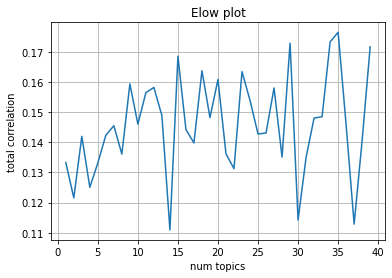

In [7]:
total_correlation = []

for n in range(1, 40):
    anchors = []
    model = ct.Corex(n_hidden = n, seed = 23)
    model = model.fit(tfidf, words=vocab)
    total_correlation.append(model.tc)
    
x = range(1, 40)
y = total_correlation

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel = 'num topics', ylabel = 'total correlation', title = 'Elow plot')
ax.grid()

plt.show()

In [31]:
anchors = []
model = ct.Corex(n_hidden=9, seed = 23)
model = model.fit(tfidf, words=vocab)

In [32]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print(f"Topic #{i+1}: {', '.join(topic_ngrams)}")

Topic #1: verify, verification, identity, topup, top, verify topup, auto, source, payment, credit card
Topic #2: virtual, virtual card, disposable, disposable card, disposable virtual, activate, activate card, card, new card, wont
Topic #3: rate, exchange rate, exchange, wrong, correct, foreign, getting cash, item, cash, currency
Topic #4: direct debit, direct, debit, recognize, dont recognize, dont, set, strange, payment app, see
Topic #5: mastercard, visa, visa mastercard, pin, change pin, change, physical, physical card, card pin, give
Topic #6: would like, like, would, delete account, delete, like know, service, know, purchase, understand
Topic #7: european, european bank, bank, get charged
Topic #8: extra, extra fee, charged extra
Topic #9: left, hotel, phone


In [43]:
anchor_df = data_sample.copy()

topic_df = pd.DataFrame(model.transform(tfidf), 
                        columns=[f"topic_{i+1}" for i in range(model.n_hidden)]
                       ).astype(float)

topic_df.index = anchor_df.index
anchor_df = pd.concat([anchor_df, topic_df], axis=1)
anchor_df.sample(5)

,Unnamed: 0,text,category,cleaned_text,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
515,4583,I need an ATM right now!,atm_support,need atm right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
911,9356,Why was I charged for cash withdrawal?,cash_withdrawal_charge,charged cash withdrawal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
467,6961,I would like to change the the PIN on my card.,change_pin,would like change pin card,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
602,9268,How do I active this card?,activate_my_card,active card,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
975,685,"In my statement, there was an extra €1 fee",extra_charge_on_statement,statement extra fee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
anchor_df[anchor_df['topic_4']==1]

,Unnamed: 0,text,category,cleaned_text,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
50,4696,I see a direct debit that isn't mine? How can I get my money back?,direct_debit_payment_not_recognised,see direct debit isnt mine get money back,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
188,3528,There's a payment in the app I don't recognize.,card_payment_not_recognised,there payment app dont recognize,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
200,3593,I have a card payment that I don't recognize. What should I do?,card_payment_not_recognised,card payment dont recognize,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
243,4750,Help! In the app there is a direct debit that I don't remember.,direct_debit_payment_not_recognised,help app direct debit dont remember,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
346,4728,I have a direct debit on my records that is strange and I need help.,direct_debit_payment_not_recognised,direct debit record strange need help,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
354,4759,I didn't make the direct debit payment on my account.,direct_debit_payment_not_recognised,didnt make direct debit payment account,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
424,4797,I do not recognize a direct debit payment that I see on my app,direct_debit_payment_not_recognised,recognize direct debit payment see app,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
604,4751,Please help me regarding a direct debit in the app that I don't recognize.,direct_debit_payment_not_recognised,please help regarding direct debit app dont recognize,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
612,4646,I see a direct debit transaction in my history that I did not set up.,direct_debit_payment_not_recognised,see direct debit transaction history set,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
692,3514,"I don't recognize this payment on my app, I am sure I didn't spend any money there.",card_payment_not_recognised,dont recognize payment app sure didnt spend money,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### With anchor words

In [18]:
anchors = [
    ['card'], 
    ['money'], 
    ['account'], 
    ['payment'], 
    ['transfer'], 
    ['cash'], 
    ['exchange', 'rate'], 
    ['charged'], 
    ['withdrawal'], 
    ['fee'], 
    ['atm'], 
    ['refund'], 
    ['pending'], 
    ['currency'], 
    ['transaction'], 
    ['declined'], 
    ['pin'], 
    ['balance'], 
    ['identity'], 
    ['stolen'], 
    ['foreign']]

anchors = [
    [a for a in topic if a in vocab]
    for topic in anchors
]

model = ct.Corex(n_hidden=len(anchors), seed=42)
model = model.fit(tfidf, words=vocab, anchors=anchors, anchor_strength=5)
print(f"model total correlation: {model.tc}")

model total correlation: 3.5072613908472703


In [17]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print(f"Topic #{i+1}: {', '.join(topic_ngrams)}")

Topic #1: card, virtual card, virtual, disposable, new card, disposable card, get card, disposable virtual, activate, using card
Topic #2: money, money account, transferred, get money, transferred money, withdraw money, add money, money back, add, friend
Topic #3: account, top account, delete, delete account, daughter, card account, wrong account, topup, dont see, please
Topic #4: payment, card payment, payment card, payment cancelled, payment app, payment made, recognize, cancelled, made payment, dont recognize
Topic #5: transfer, bank transfer, swift, money transfer, bank, transfer money, long, take, china, long take
Topic #6: cash, getting cash, cash deposit, withdrew, deposited, deposit, withdraw, need, got, would
Topic #7: exchange, rate, exchange rate, wrong, correct, item, eur, abroad, top, think
Topic #8: charged, charged extra, get charged, twice, may, reason, know
Topic #9: withdrawal, cash withdrawal, strange, please help, wasnt, believe
Topic #10: fee, charged fee, extra fe